In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titan_train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


SibSp is the count of siblings or spouse

### Finding the Missing Values

We need to find out the NaN values present in our dataset

In [7]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Now, we want to plot this using a heatmap to see where all we have a null value

<AxesSubplot:>

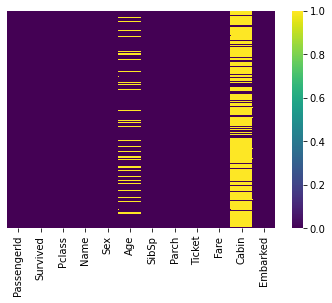

In [8]:
#This heatmap shows the places where it is false. So we can remove the y-axis markings also. All the null values are show in yellow
sns.heatmap(titanic_df.isnull(), cmap = 'viridis',yticklabels = False)

Both Age and Cabin columns have data missing. But in the age column, we can see that the data missing isn't too much, so we can 
replace it with some other values. But in cabin column, most of the data is missing. This can be solved by dropping the column entirely.

Now let us go column-wise. Let's start by plotting the survived column. Since it shows a 0 if person doesn't survive and a 1 if
person survives, we can go ahead with a countplot to see different statistics for survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

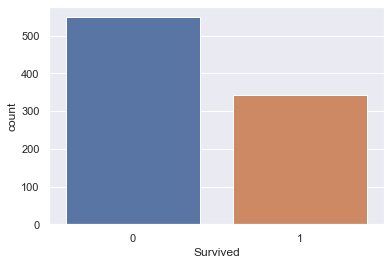

In [9]:
sns.set_theme(style = 'darkgrid') #This is used to set the background of the countplot graph.
sns.countplot(x = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

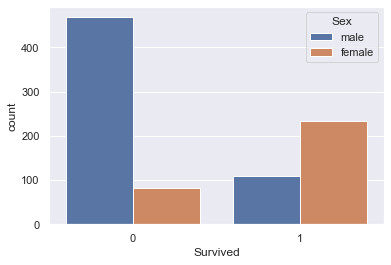

In [10]:
#Now let us see how many of these were for men and women in these two cases.

sns.set_theme(style = 'darkgrid') #This is used to set the background of the countplot graph.
sns.countplot(x = 'Survived', data = titanic_df,hue = 'Sex')

Now this above graph makes sense, as the captains of the ship prioritised the lives of women and children as compared to men

<AxesSubplot:xlabel='Survived', ylabel='count'>

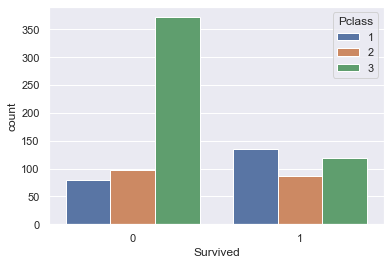

In [11]:
#Again let's see how many people survived for each PClass
sns.set_theme(style = 'darkgrid') #This is used to set the background of the countplot graph.
sns.countplot(x = 'Survived', data = titanic_df, hue = 'Pclass')

Again, from the above graph it is evident that most rich people used money to pay the captains in order to get a lifeboat and hence survived

Now, let's see the distribution of the age to see which ages were highly present and lowly present on the ship


C:\Users\Varun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

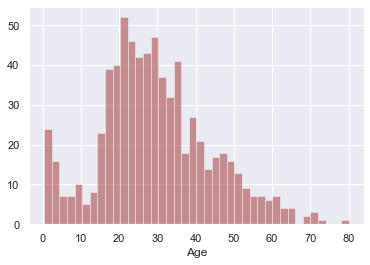

In [12]:
sns.distplot(titanic_df['Age'].dropna(),kde = False, color = 'darkred',bins = 40 )
#We don't want the probability density line, so we need to set kde = False. Also, we have used the series(or array) of age
#that does not have null data

Maximum number of people were in the 17-30 age column

Note: We could have used histogram function to get similar results instead of using distplot

Now, moving onto the next column i.e SibSp(Sibling Spouse), we start with a countplot

<AxesSubplot:xlabel='SibSp', ylabel='count'>

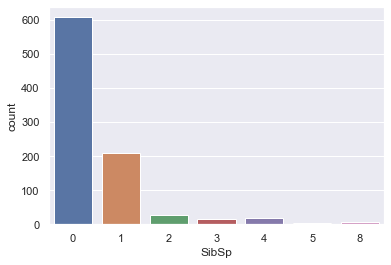

In [13]:
sns.countplot(x = 'SibSp', data = titanic_df)

We move to the next column i.e Fare to see what is the distribution of ticket fare

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

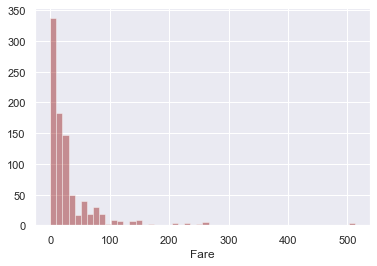

In [14]:
sns.distplot(titanic_df['Fare'], kde = False, color = 'darkred')

Now, we proceed to removing the null values from age and Cabin column

### Data Cleaning

Instead of dropping the entire age column, we can replace the null values with mean age of the passengers(imputation). However we can get our final results even more accurate, if we replace it with the mean age of that particular passenger class.

We can plot the relation between Passenger Class and Age by using a boxplot.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

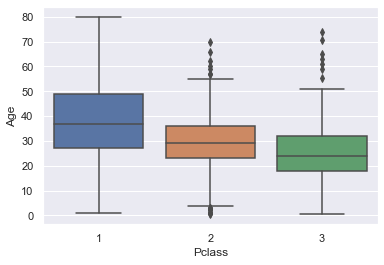

In [15]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df)

Here the base of the blue box is 25th percentile, the middle line is avg i.e 50th percentile and top of the box is the 75th percentile

Also, we can notice that the average age is higher for the better classes, and is lower for the worst classes, which makes sense. Now we will plot the average for each category

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [21]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age, axis = 1)

Now checking with the previous heatmap

<AxesSubplot:>

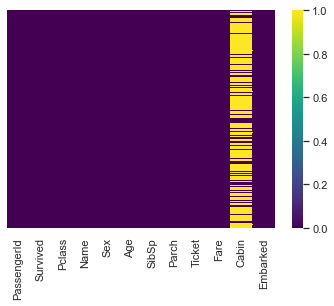

In [22]:
sns.heatmap(titanic_df.isnull(), cmap = 'viridis',yticklabels = False)

The age column which had NaN values before, is now filled with average values of the age of the person belonging to their particular passenger class

The cabin column has many null values, we could do feature engineering but not worth it. So we can go ahead and drop the cabin column.

In [23]:
titanic_df.drop('Cabin', axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

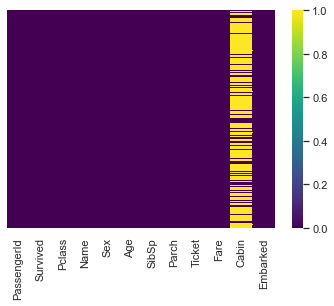

In [24]:
sns.heatmap(titanic_df.isnull(), cmap = 'viridis',yticklabels = False)

We can see that the cabin column hasn't been dropped yet. This is because we haven't said inplace = True in the df.drop statement. So:

In [25]:
titanic_df.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

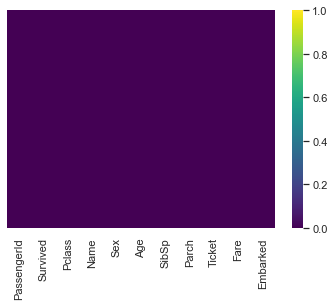

In [26]:
sns.heatmap(titanic_df.isnull(), cmap = 'viridis',yticklabels = False)

Now we can see from above that the cabin column has been dropped and there is no null values anywhere in the dataset.

There are categorical features like Sex, which has output as male or female. We need to replace this with integer output such as 0 or 1. 

### Converting Categorical Features

We need to convert categorical features to dummy variables using Pandas

This can be done using get_dummies

In [28]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see that the sex and Embarked column have categorical variables. We need to convert them into dummy variables.

In [34]:
pd.get_dummies(titanic_df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Here we see both male and female columns. But we need only 1 column, as the other one will automatically take the other value. Eg: if male is 1, then female is 0. So we can use drop_first to drop the first column.

In [41]:
pd.get_dummies(titanic_df['Sex'], drop_first = True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
pd.get_dummies(titanic_df['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Here we are dropping the P column. So when Q and S are both 0, it means that it is P.

Now, we need to make this change to our actual dataset.
So, we name our new Sex and Embarked

In [44]:
sex = pd.get_dummies(titanic_df['Sex'], drop_first = True).head()

In [45]:
embark = pd.get_dummies(titanic_df['Embarked'], drop_first = True).head()

Now, we need to drop all the unnecessary columns like name, ticket etc.

In [46]:
titanic_df.drop(['Sex','Embarked', 'Name', 'Ticket'],axis = 1,inplace = True)

In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Now, we need to add our new sex and embark columns to our dataframe.

In [66]:
titanic_df = pd.concat([titanic_df, sex, embark],axis = 1)

In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


Now we need to perform regression on this dataset. Our dependent feature is survived, whereas our independent features are the remaining columns.

### Building a Logistic Regression Model

We need to split our data into training data and test data. 

### Train Test Split

We need to remove the survived column as it is our dependent feature

In [52]:
titanic_df.drop('Survived',axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [53]:
titanic_df['Survived'].head()
#This is our output dataset

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
titanic_df.isnull().

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,True,True
887,False,False,False,False,False,False,False,True,True,True
888,False,False,False,False,False,False,False,True,True,True
889,False,False,False,False,False,False,False,True,True,True


Now doing the train test split:

In [54]:
from sklearn.model_selection import train_test_split

Take test size as 30% or 0.30(this much percentage will go as your test data); our X will be: titanic_df.drop('Survived',axis = 1)(all the independent variables) and y will be titanic_df['Survived'](the dependent variable) 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis = 1), titanic_df['Survived'], test_size=0.30, random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [69]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').